In [544]:
#SIMPLE RECOMMENDER SYSTEM

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import resample
import seaborn as sns

In [8]:

body = client_0489dff7d6ef4e0e91a361446cf75e57.get_object(Bucket='simplemovierecommendersystem-donotdelete-pr-rmcixqagcp22co',Key='ratings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_rate = pd.read_csv(body,low_memory=False)
df_rate.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0489dff7d6ef4e0e91a361446cf75e57 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ed7fX3c_rQn3qQA5xH2YoJ9mNQlIxnVSXJ0j7Umw4HdM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0489dff7d6ef4e0e91a361446cf75e57.get_object(Bucket='simplemovierecommendersystem-donotdelete-pr-rmcixqagcp22co',Key='movies.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_mov = pd.read_csv(body,low_memory=False)
df_mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#Merge the two dataframes based on movieId
movie_df=pd.merge(df_rate,df_mov,on='movieId')
movie_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [548]:
#Average rating of each movie
movie_df.groupby('title')['rating'].mean()#SERIES

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [549]:
#Highest rated movie considering even 1 user
#movie.groupby('title')['rating'].mean().sort_values(ascending=False)
#We ignore this particular series

In [550]:
#Highest rated movie by all users
movie_df.groupby('title')['rating'].count().sort_values(ascending=False) #SERIES

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [551]:
#Creating a dataframe containing the average rating and corresponding rating count
ratings_df=pd.DataFrame(movie_df.groupby('title')['rating'].mean())
ratings_df['no.of ratings']=movie_df.groupby('title')['rating'].count()
ratings_df

,rating,no.of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<AxesSubplot:>

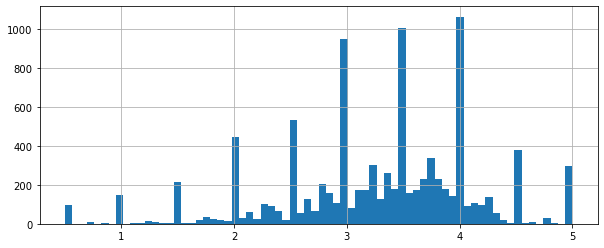

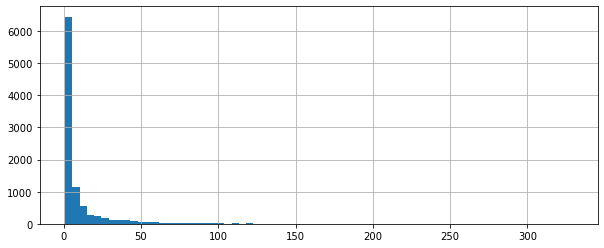

In [552]:
#Plotting the number of ratings and average ratings
plt.figure(figsize=(10,4))
ratings_df['rating'].hist(bins=70)
plt.figure(figsize=(10,4))
ratings_df['no.of ratings'].hist(bins=70)

In [553]:
#We now find the similarities between movies
#We create a similarity matrix where user ID is the index and column comprises of the titles
similar_df=pd.pivot_table(data=movie_df,index='userId',columns='title',values='rating')
ratings_df.sort_values('no.of ratings',ascending=False)
#We see the highest rated movie is Forrest Gump(1994)

,rating,no.of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


In [554]:
"""The highest rated movie according to this data is Forrest Gump and we
want to find the movie similar to it"""
forrest_gump_rating=similar_df['Forrest Gump (1994)']#SERIES
movies_like_forrest_gump= similar_df.corrwith(forrest_gump_rating)#SERIES
#Our result has some Nan Values, so lets get rid of them and convert the series into a data frame

c:\program files (x86)\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\program files (x86)\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [555]:
corr_forrest_gump_df=pd.DataFrame(movies_like_forrest_gump,columns=['Correlation'])
corr_forrest_gump_df.dropna(inplace=True)
print(corr_forrest_gump_df.sort_values('Correlation',ascending=False))
"""From the output you can see that the movies that have high correlation
with "Forrest Gump (1994)" are not very well known. This shows that correlation alone
is not a good metric for similarity because there can be a user who watched
'"Forest Gump (1994)" and only one other movie and rated both of them as 5."""

                                           Correlation
title                                                 
Lost & Found (1999)                                1.0
Cercle Rouge, Le (Red Circle, The) (1970)          1.0
Play Time (a.k.a. Playtime) (1967)                 1.0
Killers (2010)                                     1.0
Playing God (1997)                                 1.0
...                                                ...
Allnighter, The (1987)                            -1.0
Gigi (1949)                                       -1.0
Alligator (1980)                                  -1.0
Misérables, Les (2000)                            -1.0
Jack Whitehall: At Large (2017)                   -1.0

[5460 rows x 1 columns]


'From the output you can see that the movies that have high correlation\nwith "Forrest Gump (1994)" are not very well known. This shows that correlation alone\nis not a good metric for similarity because there can be a user who watched\n\'"Forest Gump (1994)" and only one other movie and rated both of them as 5.'

In [556]:
"""Since the highest correlated movies are not well known we add the ratings
column to the above dataframe, such that we can find correlated movies which
are well known according to the highest no.of ratings"""
corr_forrest_gump_df['No. of Ratings'] = ratings_df['no.of ratings']
corr_forrest_gump_df.sort_values('Correlation',ascending=False)
#df=corr_forrest_gump_df[corr_forrest_gump_df['Correlation']==1.0]
#df.sort_values('No. of Ratings',ascending=False)
corr_forrest_gump_df=corr_forrest_gump_df[corr_forrest_gump_df['No. of Ratings']>50].sort_values("Correlation",ascending=False)
corr_forrest_gump_df

,Correlation,No. of Ratings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
...,...,...
Harry Potter and the Prisoner of Azkaban (2004),-0.131888,93
Ed Wood (1994),-0.163673,70
Zoolander (2001),-0.182810,54
